In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import datetime

def _format_k(prec):
    """
        format yaxis 10_000 as 10 k.
        _format_k(0)(1200, 1000.0) gives "1 k"
        _format_k(1)(1200, 1000.0) gives "1.2 k"
    """

    def inner(xval, tickpos):
        return f"${xval/1_000:.{prec}f}\,$k"

    return inner

In [3]:
import theano
import theano.tensor as tt
theano.config.gcc.cxxflags = "-Wno-c++11-narrowing"

def tt_lognormal(x, mu, sigma):
    x = tt.clip(x,1e-12,1e12) # Checks to improve stability and resilience against NANs
    
    distr = 1/x* tt.exp(-((tt.log(x) - mu) ** 2) / (2 * sigma ** 2))
    return distr / (tt.sum(distr, axis=0)+1e-9)

d = tt.vector()
s_lognormal_median = tt.scalar()
s_lognormal_sigma = tt.scalar()

s_beta = tt_lognormal(d, tt.log(s_lognormal_median), s_lognormal_sigma)
f_beta = theano.function([d,s_lognormal_median,s_lognormal_sigma],[s_beta])

In [4]:
onsets_start = datetime.date(2020,2,16)
publish_start =datetime.date(2020,3,4)
now = datetime.date(2020,5,18)
print((now-onsets_start).days,(now-publish_start).days)

92 75


In [5]:
# Deaths digitized from the RKI's situation reports. Actual date of death was first included as a graph at 2020-05-08
# Both Database dump and situation-reports number for the day refers to day of reporting.
startdate = datetime.date(2020,3,7)
deaths = {}
deaths[200508] = [0, 1, 2, 1, 1, 3, 2, 2, 3, 10, 12, 12, 20, 38, 23, 39, 38, 64, 74, 87, 101, 106, 115, 170, 157, 161, 199, 192, 218, 232, 238, 244, 244, 242, 233, 232, 222, 229, 236, 219, 221, 221, 171, 195, 200, 159, 177, 136, 152, 116, 129, 114, 100, 109, 104, 80, 62, 77, 68, 64, 38, 2]
deaths[200509] = [0, 1, 3, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 38, 24, 40, 40, 65, 74, 89, 101, 107, 115, 170, 157, 161, 200, 192, 219, 231, 238, 244, 246, 245, 233, 232, 222, 232, 236, 219, 223, 223, 174, 195, 200, 160, 180, 140, 151, 118, 130, 118, 105, 109, 105, 86, 64, 80, 70, 70, 55, 29, 13]
deaths[200510] = [0, 1, 3, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 38, 24, 40, 40, 65, 74, 89, 101, 107, 115, 170, 157, 161, 201, 192, 219, 231, 238, 245, 245, 245, 233, 232, 222, 232, 236, 219, 223, 224, 175, 196, 201, 161, 181, 142, 151, 119, 131, 118, 105, 109, 105, 86, 64, 79, 71, 75, 56, 33, 22, 1]
deaths[200511] = [0, 1, 3, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 37, 24, 40, 40, 65, 74, 89, 101, 107, 115, 170, 157, 161, 200, 192, 219, 231, 237, 244, 245, 245, 233, 232, 221, 231, 237, 219, 224, 224, 175, 196, 200, 160, 182, 142, 152, 119, 131, 118, 107, 109, 105, 87, 64, 79, 71, 75, 57, 34, 27, 6, 4]
deaths[200512] = [0, 1, 3, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 40, 41, 65, 74, 89, 101, 107, 116, 170, 158, 160, 201, 192, 220, 232, 239, 245, 245, 245, 232, 233, 224, 234, 237, 219, 225, 224, 175, 197, 201, 162, 183, 142, 154, 119, 133, 118, 108, 110, 106, 88, 66, 80, 73, 76, 60, 44, 39, 33, 26, 11]
deaths[200513] = [0, 1, 3, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 40, 40, 65, 74, 90, 101, 107, 115, 171, 160, 160, 199, 195, 220, 232, 238, 245, 245, 245, 232, 235, 225, 236, 239, 219, 226, 225, 175, 199, 202, 162, 184, 144, 154, 120, 133, 118, 111, 113, 109, 91, 67, 81, 74, 80, 65, 46, 48, 39, 46, 30, 5]
deaths[200514] = [0, 1, 3, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 40, 40, 65, 74, 89, 101, 107, 115, 169, 162, 161, 198, 195, 220, 232, 239, 244, 244, 245, 232, 235, 228, 236, 240, 219, 226, 226, 176, 200, 201, 164, 185, 145, 155, 120, 134, 118, 113, 117, 111, 95, 70, 84, 76, 82, 67, 48, 49, 43, 52, 48, 18, 4]
deaths[200515] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 40, 40, 65, 74, 90, 102, 107, 115, 170, 162, 163, 199, 195, 220, 233, 237, 246, 249, 248, 233, 236, 229, 235, 241, 219, 229, 227, 178, 201, 203, 166, 187, 145, 155, 121, 136, 118, 118, 122, 114, 97, 73, 85, 74, 82, 69, 50, 50, 45, 55, 53, 30, 23, 9]
deaths[200516] = [0, 1, 2, 1, 1, 4, 2, 2, 4, 10, 12, 12, 20, 38, 24, 40, 39, 65, 75, 89, 102, 107, 114, 170, 162, 163, 199, 195, 221, 233, 239, 246, 251, 251, 233, 238, 229, 235, 241, 218, 232, 228, 179, 202, 204, 166, 187, 147, 155, 121, 139, 116, 119, 123, 114, 97, 75, 86, 75, 84, 72, 50, 50, 47, 57, 54, 32, 30, 28, 5]
deaths[200517] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 64, 75, 90, 102, 106, 115, 170, 162, 163, 199, 195, 220, 234, 239, 246, 251, 251, 232, 238, 229, 237, 241, 218, 232, 229, 180, 203, 204, 168, 187, 147, 155, 121, 140, 119, 120, 122, 115, 98, 75, 87, 75, 84, 72, 51, 50, 49, 58, 56, 35, 35, 34, 9]
deaths[200518] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 89, 102, 107, 115, 170, 162, 163, 199, 195, 221, 234, 239, 246, 252, 252, 232, 238, 229, 237, 240, 219, 232, 229, 180, 203, 204, 168, 187, 147, 156, 121, 140, 121, 120, 123, 115, 98, 75, 87, 76, 83, 72, 51, 50, 50, 58, 56, 38, 35, 36, 14, 2, 4]
deaths[200519] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 91, 102, 107, 115, 170, 162, 163, 199, 195, 221, 234, 239, 246, 253, 251, 232, 238, 230, 238, 240, 220, 232, 229, 181, 204, 204, 167, 188, 148, 156, 122, 140, 123, 122, 124, 115, 98, 76, 89, 76, 85, 72, 52, 51, 53, 58, 56, 39, 40, 40, 23, 11, 13, 8]
deaths[200520] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 91, 102, 107, 115, 170, 162, 163, 200, 195, 221, 234, 240, 247, 254, 252, 235, 239, 234, 237, 240, 220, 234, 230, 183, 205, 205, 168, 188, 148, 156, 122, 141, 123, 122, 124, 116, 98, 76, 91, 77, 86, 72, 55, 52, 55, 60, 58, 40, 43, 45, 33, 20, 17, 20, 6]
deaths[200521] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 92, 102, 107, 115, 170, 162, 162, 201, 195, 221, 234, 241, 248, 254, 252, 235, 239, 234, 237, 240, 220, 234, 231, 183, 205, 205, 168, 189, 148, 156, 122, 140, 124, 121, 124, 116, 100, 75, 90, 76, 86, 73, 56, 54, 58, 59, 60, 40, 43, 47, 35, 23, 24, 27, 23, 6]
deaths[200522] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 23, 41, 40, 65, 75, 92, 102, 107, 115, 170, 162, 162, 201, 195, 221, 234, 241, 248, 254, 252, 235, 239, 235, 237, 240, 220, 234, 231, 183, 205, 204, 168, 189, 148, 157, 123, 140, 125, 122, 124, 117, 100, 75, 91, 77, 85, 73, 56, 54, 58, 59, 60, 40, 44, 48, 37, 23, 25, 31, 27, 17, 2]
deaths[200523] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 92, 102, 107, 115, 170, 162, 162, 201, 195, 221, 234, 241, 248, 255, 252, 235, 239, 235, 236, 241, 220, 234, 231, 182, 205, 205, 168, 189, 148, 158, 123, 140, 125, 122, 124, 118, 100, 75, 91, 77, 86, 73, 56, 55, 58, 60, 60, 40, 44, 48, 40, 24, 28, 34, 28, 28, 15, 3]
deaths[200524] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 92, 102, 107, 115, 170, 161, 161, 201, 195, 221, 234, 241, 248, 255, 252, 235, 239, 235, 237, 242, 220, 234, 231, 183, 205, 205, 168, 189, 149, 158, 123, 140, 125, 122, 124, 118, 100, 75, 91, 77, 85, 75, 57, 55, 58, 60, 60, 40, 45, 48, 40, 24, 29, 34, 30, 33, 20, 11, 3]
deaths[200525] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 92, 102, 107, 115, 170, 162, 162, 201, 195, 221, 234, 241, 248, 255, 252, 235, 239, 235, 237, 242, 220, 234, 231, 183, 205, 205, 168, 189, 149, 158, 123, 140, 125, 122, 124, 118, 100, 75, 91, 77, 85, 75, 57, 55, 58, 60, 60, 40, 45, 50, 40, 24, 29, 35, 30, 34, 20, 13, 6]
deaths[200526] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 92, 102, 107, 115, 170, 162, 162, 201, 195, 221, 234, 241, 248, 255, 253, 235, 241, 235, 237, 242, 221, 234, 231, 183, 205, 206, 168, 189, 149, 158, 124, 140, 125, 123, 124, 118, 100, 75, 90, 77, 87, 75, 57, 55, 58, 59, 61, 40, 45, 51, 42, 24, 30, 36, 31, 36, 23, 23, 14, 9, 3]
deaths[200527] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 25, 41, 40, 66, 75, 92, 102, 107, 115, 170, 162, 162, 201, 195, 221, 232, 242, 249, 255, 253, 235, 241, 235, 237, 242, 219, 236, 233, 183, 205, 207, 168, 189, 150, 159, 124, 140, 125, 123, 124, 118, 100, 75, 91, 77, 87, 75, 58, 55, 57, 60, 61, 40, 47, 53, 41, 25, 31, 38, 33, 41, 24, 23, 18, 21, 10, 2]
deaths[200528] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 25, 41, 40, 66, 74, 92, 102, 107, 114, 170, 162, 161, 203, 195, 220, 234, 242, 250, 255, 253, 236, 241, 235, 238, 243, 219, 234, 235, 185, 205, 208, 166, 189, 151, 159, 124, 141, 126, 122, 124, 119, 100, 75, 92, 76, 87, 75, 61, 54, 57, 60, 62, 41, 47, 54, 43, 25, 32, 40, 34, 45, 27, 26, 21, 27, 20, 11, 3]
deaths[200529] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 25, 41, 40, 66, 75, 92, 102, 107, 115, 170, 162, 161, 203, 196, 221, 233, 242, 251, 257, 253, 237, 242, 236, 240, 242, 219, 235, 235, 185, 205, 208, 166, 189, 151, 160, 124, 142, 127, 123, 125, 119, 100, 76, 92, 76, 87, 78, 61, 54, 57, 60, 62, 42, 48, 56, 43, 25, 32, 42, 35, 43, 27, 26, 23, 30, 22, 15, 4, 3]
deaths[200530] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 25, 41, 40, 66, 75, 92, 102, 107, 115, 170, 162, 161, 203, 196, 221, 233, 242, 251, 257, 254, 237, 242, 236, 242, 242, 219, 235, 235, 186, 206, 208, 166, 189, 151, 160, 124, 142, 127, 123, 126, 119, 101, 76, 94, 77, 87, 78, 62, 54, 57, 60, 63, 42, 48, 57, 45, 25, 32, 42, 39, 45, 28, 27, 23, 31, 23, 18, 9, 8, 3]
deaths[200531] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 25, 41, 40, 66, 75, 92, 102, 107, 115, 170, 162, 161, 203, 196, 221, 234, 242, 251, 257, 254, 237, 242, 236, 242, 242, 219, 235, 235, 187, 206, 208, 166, 189, 151, 160, 124, 142, 128, 123, 126, 119, 101, 76, 93, 77, 87, 78, 62, 54, 58, 60, 63, 42, 48, 58, 46, 25, 32, 42, 39, 45, 28, 27, 23, 31, 24, 18, 9, 9, 5]
deaths[200601] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 38, 25, 41, 40, 67, 75, 92, 102, 107, 115, 170, 162, 161, 203, 196, 221, 235, 241, 251, 257, 254, 237, 242, 236, 242, 242, 219, 235, 235, 187, 206, 208, 166, 189, 151, 160, 124, 142, 128, 123, 126, 119, 101, 76, 93, 77, 87, 78, 62, 54, 58, 60, 63, 42, 48, 58, 46, 25, 33, 42, 40, 46, 28, 27, 23, 31, 25, 18, 12, 11, 5, 2]
deaths[200602] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 25, 41, 40, 67, 75, 92, 102, 107, 115, 170, 162, 161, 203, 197, 221, 235, 241, 251, 257, 254, 237, 242, 236, 242, 242, 219, 235, 235, 188, 205, 208, 166, 189, 151, 160, 124, 142, 128, 123, 126, 120, 101, 76, 93, 77, 88, 79, 62, 54, 58, 61, 63, 42, 48, 58, 47, 25, 32, 42, 40, 45, 28, 27, 23, 30, 25, 18, 13, 11, 6, 3, 3, 2]
deaths[200604] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 25, 41, 40, 67, 75, 92, 102, 107, 115, 170, 163, 161, 203, 198, 221, 236, 241, 251, 257, 254, 238, 243, 236, 242, 242, 219, 235, 235, 189, 204, 208, 167, 191, 151, 160, 123, 141, 128, 123, 126, 119, 101, 76, 93, 77, 90, 79, 64, 54, 58, 63, 63, 42, 50, 58, 47, 26, 33, 42, 41, 45, 29, 28, 25, 29, 28, 18, 15, 14, 10, 8, 7, 12, 6, 2]
deaths[200605] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 13, 12, 21, 39, 25, 41, 40, 67, 75, 92, 102, 108, 115, 170, 163, 161, 203, 198, 221, 236, 241, 251, 258, 254, 237, 243, 237, 241, 242, 219, 235, 235, 190, 204, 207, 166, 191, 151, 160, 123, 140, 129, 123, 126, 119, 102, 76, 93, 77, 90, 79, 64, 54, 59, 63, 63, 42, 50, 58, 47, 26, 37, 42, 41, 45, 29, 30, 25, 30, 29, 19, 17, 16, 11, 9, 9, 16, 9, 7, 3]
deaths[200606] = [0, 1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 25, 41, 40, 67, 75, 92, 102, 108, 115, 171, 163, 161, 203, 198, 221, 236, 241, 251, 258, 254, 239, 243, 237, 241, 242, 219, 235, 236, 190, 204, 207, 167, 191, 151, 159, 124, 139, 128, 124, 126, 118, 102, 76, 92, 77, 90, 79, 64, 54, 59, 63, 63, 42, 52, 58, 47, 26, 37, 42, 42, 45, 29, 30, 25, 31, 30, 19, 18, 16, 11, 13, 11, 20, 10, 12, 9, 2]
deaths[200607] = [0, 1, 2, 1, 1, 4, 2, 2, 4, 11, 12, 12, 20, 38, 24, 41, 40, 67, 74, 92, 103, 108, 115, 172, 163, 161, 203, 198, 222, 237, 241, 253, 258, 254, 239, 243, 237, 241, 242, 220, 235, 236, 190, 204, 207, 167, 191, 152, 160, 124, 140, 127, 124, 126, 118, 102, 75, 93, 78, 90, 79, 64, 54, 59, 63, 63, 42, 52, 58, 47, 26, 37, 42, 42, 44, 29, 30, 24, 31, 30, 19, 18, 16, 12, 13, 12, 19, 9, 15, 11, 4]
deaths[200608] = [0, 1, 2, 1, 1, 3, 2, 2, 3, 11, 12, 12, 21, 38, 24, 40, 39, 67, 74, 92, 103, 108, 115, 172, 162, 161, 203, 198, 222, 237, 241, 253, 258, 254, 239, 243, 237, 241, 241, 220, 235, 236, 190, 204, 207, 169, 191, 152, 160, 125, 140, 128, 125, 126, 118, 102, 76, 93, 77, 90, 79, 64, 54, 59, 63, 63, 42, 52, 58, 47, 26, 37, 42, 42, 44, 30, 30, 24, 31, 30, 19, 18, 16, 12, 14, 12, 19, 11, 15, 11, 5]
deaths[200609] = [0, 1, 1, 1, 1, 5, 2, 2, 3, 11, 12, 11, 20, 38, 24, 40, 40, 66, 74, 92, 103, 108, 115, 171, 165, 162, 203, 198, 223, 237, 241, 253, 259, 254, 238, 244, 237, 241, 241, 220, 235, 237, 191, 204, 207, 170, 193, 153, 160, 125, 140, 128, 125, 128, 117, 102, 75, 93, 78, 90, 79, 64, 54, 61, 64, 62, 42, 51, 60, 45, 25, 38, 42, 41, 45, 29, 29, 24, 29, 29, 20, 19, 15, 11, 13, 12, 19, 12, 14, 12, 8, 3, 2]
deaths[200618] = [1, 1, 1, 1, 1, 5, 2, 3, 4, 11, 13, 12, 21, 39, 24, 41, 40, 67, 76, 92, 103, 107, 115, 170, 165, 162, 204, 199, 222, 238, 241, 253, 259, 255, 238, 244, 238, 243, 241, 221, 237, 238, 191, 204, 207, 171, 194, 154, 160, 128, 140, 130, 124, 128, 120, 102, 75, 93, 77, 92, 81, 65, 54, 61, 64, 63, 42, 53, 62, 46, 28, 38, 43, 44, 45, 31, 31, 27, 30, 31, 23, 21, 16, 16, 14, 16, 22, 14, 16, 17, 14, 7, 9, 7, 4, 8, 8, 13, 5, 5, 6, 2]
deaths[200623] = [1, 1, 1, 1, 1, 5, 2, 3, 4, 11, 13, 12, 21, 39, 24, 41, 40, 67, 76, 92, 103, 107, 115, 170, 165, 162, 204, 199, 222, 238, 241, 253, 259, 255, 238, 244, 238, 243, 241, 221, 237, 238, 191, 204, 207, 171, 194, 154, 160, 128, 140, 125, 128, 120, 106,  75, 92, 78, 92, 81, 65, 54, 61, 64, 63, 42, 54, 66, 45, 29, 40, 43, 44, 46, 31, 31, 27, 30, 31, 23, 21, 16, 18, 16, 17, 23, 14, 18, 18, 14, 6, 9, 6, 4, 10, 10, 13, 7, 6, 8, 7, 5, 7, 2, 2, 3, 1]
deaths[200624] = [0, 1, 1, 1, 1, 5, 2, 3, 4, 11, 13, 12, 21, 40, 23, 41, 40, 67, 76, 92, 104, 107, 114, 170, 165, 162, 204, 200, 223, 239, 241, 253, 260, 255, 239, 245, 237, 243, 241, 224, 239, 239, 191, 204, 209, 172, 194, 157, 160, 129, 141, 130, 125, 128, 120, 106, 75, 92, 79, 92, 82, 65, 54, 62, 64, 63, 42, 54, 66, 46, 29, 40, 44, 44, 46, 31, 31, 27, 30, 31, 23, 21, 18, 18, 16, 17, 24, 14, 18, 18, 14, 8, 9, 8, 4, 10, 11, 13, 8, 6, 8, 7, 5, 8, 3, 2, 3, 3]
deaths[200625] = [0, 1, 1, 1, 1, 5, 2, 2, 3, 11, 12, 12, 21, 40, 23, 41, 40, 67, 75, 92, 104, 107, 114, 171, 165, 162, 204, 200, 223, 239, 241, 253, 260, 255, 239, 245, 237, 243, 241, 224, 239, 240, 191, 203, 209, 172, 193, 157, 160, 129, 141, 131, 125, 128, 120, 105, 76, 92, 79, 92, 82, 68, 54, 62, 64, 63, 42, 54, 65, 46, 28, 39, 43, 43, 46, 31, 31, 27, 29, 31, 23, 21, 18, 18, 16, 17, 24, 13, 18, 18, 14, 7, 8, 7, 5, 9, 11, 12, 7, 6, 7, 7, 5, 7, 4, 2, 3, 2, 1]
deaths[200626] = [0, 1, 1, 1, 1, 5, 2, 2, 3, 11, 12, 12, 21, 40, 23, 41, 40, 67, 75, 92, 104, 107, 114, 171, 165, 162, 204, 200, 223, 239, 241, 253, 260, 255, 239, 245, 237, 243, 241, 224, 239, 240, 191, 203, 209, 172, 193, 157, 160, 129, 141, 131, 125, 128, 120, 105, 76, 92, 79, 92, 81, 68, 54, 62, 64, 62, 41, 54, 65, 45, 28, 39, 43, 44, 45, 31, 32, 26, 29, 30, 23, 20, 18, 18, 16, 18, 23, 14, 18, 18, 13, 7, 8, 7, 4, 9, 11, 12, 7, 5, 8, 7, 4, 7, 4, 2, 2, 4, 4, 2, 3]
deaths[200629] = [0, 1, 1, 1, 1, 5, 2, 2, 3, 11, 12, 12, 21, 40, 23, 41, 40, 67, 75, 92, 104, 107, 114, 171, 165, 162, 204, 200, 223, 239, 241, 253, 260, 255, 239, 245, 237, 243, 241, 224, 239, 240, 191, 203, 209, 172, 193, 157, 160, 129, 141, 131, 125, 128, 120, 106, 76, 92, 78, 93, 81, 69, 54, 62, 64, 63, 42, 54, 66, 45, 29, 40, 44, 45, 46, 31, 32, 27, 29, 31, 23, 21, 18, 19, 16, 18, 24, 15, 18, 18, 14, 8, 9, 8, 6, 10, 11, 13, 8, 6, 8, 7, 6, 8, 4, 3, 4, 4, 5, 4, 6, 3, 1]
deaths[200630] = [0, 1, 1, 1, 1, 5, 2, 2, 3, 11, 12, 12, 21, 40, 23, 41, 40, 67, 75, 92, 104, 107, 114, 171, 165, 162, 204, 200, 223, 239, 241, 253, 260, 255, 239, 245, 237, 243, 241, 224, 239, 240, 191, 203, 209, 172, 193, 157, 160, 129, 141, 131, 125, 128, 121, 106, 76, 92, 78, 93, 81, 69, 54, 62, 64, 63, 42, 54, 66, 45, 29, 40, 44, 45, 47, 31, 32, 27, 30, 31, 23, 21, 18, 19, 16, 18, 24, 15, 18, 18, 14, 8, 9, 8, 6, 10, 11, 14, 8, 7, 9, 7, 6, 9, 4, 3, 4, 4, 5, 4, 6, 5, 3, 4, 2]
deaths[200701] = [1, 1, 1, 1, 1, 5, 2, 3, 4, 11, 13, 12, 21, 40, 24, 41, 41, 67, 76, 92, 104, 107, 114, 172, 165, 162, 204, 199, 223, 240, 240, 253, 260, 257, 240, 246, 238, 243, 245, 227, 239, 241, 190, 203, 208, 172, 194, 156, 163, 129, 141, 131, 125, 128, 120, 106, 76, 92, 78, 93, 81, 69, 54, 62, 64, 63, 42, 54, 66, 45, 29, 40, 44, 45, 47, 31, 33, 27, 30, 31, 23, 21, 18, 19, 16, 18, 24, 15, 18, 18, 14, 8, 9, 8, 6, 10, 11, 14, 8, 6, 9, 7, 6, 9, 4, 3, 4, 4, 6, 5, 6, 6, 3, 6, 5]
deaths[200702] = [0, 1, 1, 1, 1, 5, 2, 3, 4, 11, 13, 12, 21, 40, 24, 42, 42, 67, 76, 92, 104, 107, 114, 172, 165, 162, 204, 199, 223, 240, 240, 254, 259, 257, 240, 246, 238, 243, 245, 227, 239, 241, 191, 203, 209, 172, 194, 157, 163, 130, 141, 132, 125, 128, 121, 106, 77, 92, 78, 93, 82, 69, 54, 63, 64, 63, 42, 54, 66, 45, 29, 40, 44, 45, 47, 31, 33, 27, 30, 31, 24, 21, 18, 19, 17, 18, 24, 15, 18, 18, 14, 8, 9, 8, 6, 10, 11, 14, 8, 6, 9, 7, 6, 9, 4, 3, 4, 4, 6, 6, 7, 7, 4, 6, 7]
deaths[200703] = [0, 1, 1, 1, 1, 5, 2, 3, 4, 11, 13, 12, 21, 40, 24, 42, 42, 67, 76, 92, 104, 107, 114, 172, 165, 162, 204, 199, 223, 240, 240, 254, 260, 257, 240, 246, 239, 243, 245, 227, 239, 241, 191, 203, 209, 172, 194, 157, 163, 129, 141, 132, 125, 128, 121, 106, 76, 92, 78, 93, 82, 69, 54, 63, 64, 63, 42, 54, 66, 47, 29, 40, 44, 45, 47, 31, 33, 27, 30, 31, 23, 21, 18, 19, 17, 18, 24, 15, 18, 18, 14, 8, 9, 8, 6, 11, 11, 14, 9, 6, 9, 7, 7, 9, 6, 3, 4, 4, 6, 7, 7, 7, 4, 7, 8, 1]



for k,v in deaths.items():
    v.append(0)

In [35]:
def to_dataframe(deaths,startdate):
    """
    Returns the dataframe for the deaths list columns beeing realease date and
    rows(index) beeing cases on the given date.
    """
    df = pd.DataFrame()
    keys = sorted(deaths.keys())
    
    for key in keys:
        # Create datetime from index string
        released_on = datetime.datetime.strptime(str(key),"%y%m%d")
        temp_df = pd.DataFrame(deaths[key], index=pd.date_range(startdate,startdate+datetime.timedelta(days=len(deaths[key])-1)),columns=[released_on])
        df = pd.concat([df, temp_df], axis=1)
    return df


def save_to_file(deaths, startdate):
    df = to_dataframe(deaths, startdate)
    df.to_csv("data/deaths_over_time.csv")
    
save_to_file(deaths,startdate)

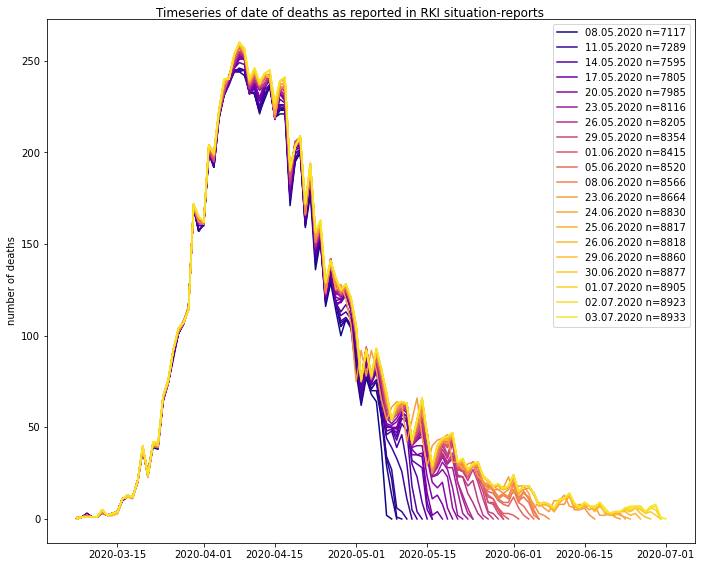

In [11]:
keys = sorted(deaths.keys())
ts = pd.date_range(startdate,periods=len(deaths[keys[-1]]),freq='D')

fig, axes = plt.subplots(1, 1, figsize = (10,8),squeeze=False)
fig.subplots_adjust(wspace=0.15,hspace=0.14,left=0.08,right=0.98,top=0.96,bottom=0.05)
#fig.suptitle("SEIR Model observation = onset-reporting-Matrix")

ax = axes[0,0]
plasma = plt.cm.plasma

keys = sorted(deaths.keys())
for i,k in enumerate(keys):
    v = deaths[k]
    c = plasma(i/(len(deaths)+1))
    ks = "%d"%k
    l = "%s.%s.20%s"%(ks[4:],ks[2:4],ks[:2])
    s = np.sum(v)
    label = None
    if i>len(keys)-10 or i%3==0:
        label = l+" n=%d"%(s)
    ax.plot(ts[:len(v)],v,label=label,color=c)
    
ax.set_ylabel("number of deaths")
ax.legend()
fig.suptitle("Timeseries of date of deaths as reported in RKI situation-reports")
plt.savefig("RKI-deaths.pdf")
plt.savefig("RKI-deaths.svg")


In [6]:
# Import KRI Nowcasting csv
def rdate(s):
    r = None
    if "T" in s:
        r = datetime.datetime.strptime(s.split("T")[0],"%Y-%m-%d")
    if "-" in s:
        r = datetime.datetime.strptime(s.split(" ")[0],"%Y-%m-%d")
    else:
        if s[:4] == "2020":
            r = datetime.datetime.strptime(s.split(" ")[0],"%Y/%m/%d")
        else:
            r = datetime.datetime.strptime(s.split(" ")[0],"%m/%d/%Y")
    return r.date()

nowcast_df = pd.read_csv("data/Nowcasting_Zahlen_200624.csv", sep=",") 
ck = nowcast_df.columns
# Renaming of columns
nowcast_df = nowcast_df.rename(columns={ck[0]:"date",ck[1]:"new_infected",ck[2]:"new_infected_low",ck[3]:"new_infected_high"})
nowcast_df = nowcast_df.rename(columns={ck[4]:"new_infected_smooth",ck[5]:"new_infected_smooth_low",ck[6]:"new_infected_smooth_high"})
nowcast_df = nowcast_df.rename(columns={ck[7]:"R_4",ck[8]:"R_4_low",ck[9]:"R_4_high"})
nowcast_df = nowcast_df.rename(columns={ck[10]:"R_4",ck[11]:"R_4_low",ck[12]:"R_4_high"})
# Generate proper timestamps
nowcast_df["date"] = nowcast_df["date"].apply(rdate)

In [7]:
# sequences (if any), prior result(s) (if needed), non-sequences (if any)
import theano.tensor.signal.conv as tt_conv
theano.config.gcc.cxxflags = "-Wno-c++11-narrowing" # not neede in actual model, but I can't find my but at the moment

d = tt.dvector()
s_median_incubation = tt.dscalar()
s_sigma_incubation = tt.dscalar()

s_beta = tt_lognormal(d, tt.log(s_median_incubation), s_sigma_incubation)
f_beta = theano.function([d,s_median_incubation,s_sigma_incubation],[s_beta])

def theano_convolve_inputrotation(inp,filt,amplitude=1,offset=0):
    """ convolves inp with filter,
        scales by amplitude,
        additional offset in positions
      --> ouput vector has length 2*inp+filt """
    # Symbolic variables for theano
    o = tt.scalar('o',dtype='int64')
    a = tt.matrix('a',dtype='float64')
    b = tt.matrix('b',dtype='float64')
    s = tt.scalar('s',dtype='float64')
    
    # Enlarge the input in order to accomodate an offset
    zero = tt.zeros_like(a)
    a0 = tt.concatenate((a,zero,),1)
    a0r = tt.roll(a0,o,1) # delay the input signal by offset
    a0rp = tt.set_subtensor(a0r[0,:o],0) * s # set front of enlarged input_vector to zero to prevent roll overspill at front
    
    # Convolve enlarged,delayed input with filter
    func = tt.signal.conv.conv2d(a0rp,b,(1,inp.shape[0]*2),(1,filt.shape[0]),border_mode='full')
    # Bild a function
    return theano.function([a,b,s,o],func)(inp[None,:],filt[None,:],amplitude,offset)


In [8]:
death_distribution = [0,0,3,11,23,23,42,48,62,57,73,81,93,81,96,109,95,68,80,62,61,68,44,51,63,49,49,40,48,28,31,24,28,24,28,26,18,16,21,19,14,14,10,17,10,9,10,6,5,13,6,5,4,5,3,2,5,3,0,2]
death_distribution = [0,0,3,11,23,23,42,48,62,57,73,81,93,81,96,109,95,68,80,62,61,68,44,51,63,49,49,40,48,28,31,24,28,24,28,26,18,16,21,19,14,14,10,17,10,9,10,6,5,13,6,5,4,5,3,2,5,3,0,2]
death_distribution = [0,0,3,11,23,23,42,48,62,57,73,81,93,81,96,109,96,68,80,62,61,68,44,51,63,49,49,40,48,28,32,24,28,24,28,26,18,16,21,20,14,14,10,17,10,9,10,6,5,13,7,5,4,5,3,2,5,3,0,3]
#death_distribution = [0,2,1,7,6,14,19,19,26,28,35,39,26,29,30,36,47,35,32,33,39,30,23,40,27,31,23,29,29,33,29,25,27,20,29,12,16,20,14,20,10,13,13,8,17,11,9,12,4,9,7,9,6,7,5,6,8,7,6,4]
#death_distribution = [0]*5+death_distribution

Text(0, 0.5, 'deats')

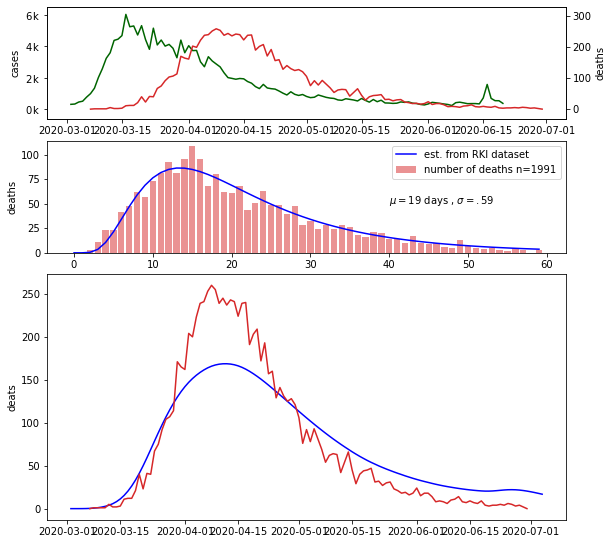

In [9]:
dk = sorted(deaths.keys())[-1]
a = np.sum(deaths[dk])/np.sum(nowcast_df["new_infected"])
tsd = pd.date_range(nowcast_df["date"][0],periods=len(nowcast_df["date"])+14,freq='D')


# Plot
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(wspace=0.33,hspace=0.19,left=0.08,right=0.98,top=0.94,bottom=0.05)

gs = fig.add_gridspec(4, 1)
ax = fig.add_subplot(gs[0,0])
bx = fig.add_subplot(gs[1,0])
cx = fig.add_subplot(gs[2:,0:])


ax.plot(nowcast_df["date"],nowcast_df["new_infected"],color="darkgreen")
ex = ax.twinx()
ex.plot(ts[:len(deaths[dk])],deaths[dk],label=l+" n=%d"%(s),color="tab:red")
ax.set_ylim(-650,6500)
ex.set_ylim(-33,330)

lndists,convd = {},{}
lndists["est. from RKI dataset"] = f_beta(np.arange(len(death_distribution)),19.,.59)[0]
lndists["b"] = f_beta(np.arange(len(death_distribution)+5),23.36,.24)[0][5:]

bx.bar(range(len(death_distribution)),death_distribution,color="tab:red",alpha=.5,label="number of deaths n=%d"%(np.sum(death_distribution)))
for k,c in zip(lndists.keys(),["blue"]):#,"purple"]):
    lndist = lndists[k]
    bx.plot(lndist*np.sum(death_distribution),color=c,label=k)
    convd[k] = theano_convolve_inputrotation(nowcast_df["new_infected"],lndist,a)[0,:len(nowcast_df["date"])+14]
    cx.plot(tsd,convd[k],color=c)

bx.text(40,50,r"$\mu = 19$ days , $\sigma = .59$")    
bx.legend()

#est_death = 

cx.plot(ts[:len(deaths[dk])],deaths[dk],label=l+" n=%d"%(s),color="tab:red")


#cx.plot(nowcast_df["date"],convd["24-24"])

for tx in [ax,bx,cx,ex]:
    prec = 1.0 / (np.log10(tx.get_ylim()[1]) - 2.5)
    if prec < 2.0 and prec >= 0:
        tx.yaxis.set_major_formatter(
            matplotlib.ticker.FuncFormatter(_format_k(int(prec)))
        )
        
ax.set_ylabel("cases")
ex.set_ylabel("deaths")
bx.set_ylabel("deaths")
cx.set_ylabel("deats")

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


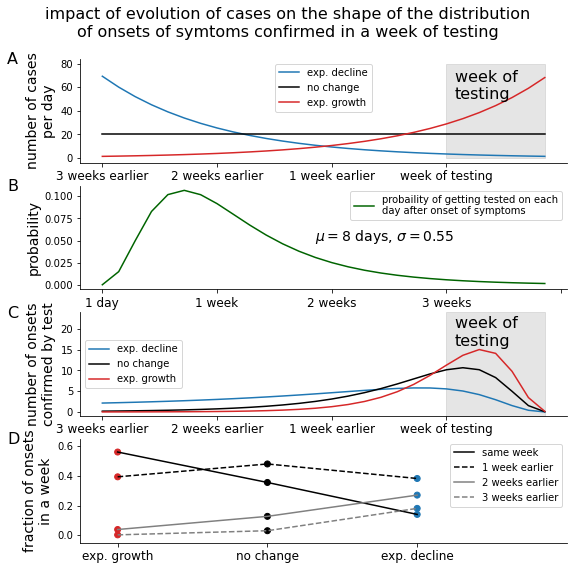

In [10]:
days = np.arange(1,29)
cases = np.ones(28)*2
cases_exp = np.exp(days/7)*.125
cases_exn = np.exp(-days/7)*8
print(cases)
x_ticks = [1,8,15,22,29]

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(wspace=0.33,hspace=0.22,left=0.14,right=0.985,top=0.89,bottom=0.05)
fig.suptitle("impact of evolution of cases on the shape of the distribution\nof onsets of symtoms confirmed in a week of testing",fontsize=16)
fig.set_alpha(0)
              
gs = fig.add_gridspec(4, 1)
ax = fig.add_subplot(gs[0,0])
cx = fig.add_subplot(gs[2,0])

mu,sigma = 8,.55
lognorm = f_beta(days,mu,sigma)[0]
lognorm_f = np.flip(lognorm)

colors = ["tab:blue","black","tab:red"]
legend = ["exp. decline","no change","exp. growth"]
wlegend = ["same week","1 week earlier","2 weeks earlier","3 weeks earlier"]
values = []

wt_labels = ["1 day","1 week","2 weeks","3 weeks"]
for y,c,l in zip([cases_exn,cases,cases_exp],colors,legend):
    ax.plot(days,y*10,color=c,label=l)
 
    weekly_td = np.zeros(28+1)
    for i in range(7):
        weekly_td[i:-1] = lognorm_f[i:] * y[i:]
    
    n_weekly_td = weekly_td/np.sum(weekly_td)*100
    cx.plot(days,n_weekly_td[:-1],color=c,label=l)#+" n=%d"%np.sum(n_weekly_td[:-1]))
    
    wdiff = np.diff(np.cumsum(n_weekly_td)[::7])[::-1]
    values.append(wdiff)

cx.set_ylim(-1,24)
    
bx = fig.add_subplot(gs[1,0])
bx.plot(days,lognorm,color="darkgreen",label="probaility of getting tested on each\nday after onset of symptoms")
bx.text(14,.05,r"$\mu=%d$ days, $\sigma=%.2f$"%(mu,sigma),fontsize=14)
bx.set_xticks([1,8,15,22])
bx.set_xticklabels(wt_labels,fontsize=12)
bx.set_ylabel("probability",fontsize=14)

ax.set_ylabel("number of cases\nper day",fontsize=14)
ax.legend()
bx.legend()
cx.legend(loc=6)
cx.set_ylabel("number of onsets\nconfirmed by test",fontsize=14)


dx = fig.add_subplot(gs[3,0])
for i,wd,l,c,m in zip(range(4),np.array(values).T,wlegend,["black","black","grey","grey"],["-","--"]*2):
    wd = wd/100.
    dx.plot(range(3),wd[::-1],m,label=l,color=c,)
    dx.scatter(range(3),wd[::-1],color=colors[::-1])
dx.legend()
dx.set_xlim(-.25,3)
dx.set_xticks([0,1,2])
dx.set_xticklabels(legend[::-1],fontsize=12)
dx.set_yticks([x/5 for x in range(4)])
dx.set_ylim(-.05,.65)
dx.set_ylabel("fraction of onsets\nin a week",fontsize=14)

ax.set_xticks(x_ticks[:-1])
ax.set_xticklabels(wlegend[-1:0:-1]+["week of testing"],fontsize=12)
bx.set_xticks(x_ticks)

cx.set_xticks(x_ticks[:-1])
cx.set_xticklabels(wlegend[-1:0:-1]+["week of testing"],fontsize=12)

ax.fill_between([22,28],[0,0],[80,80],color="grey",alpha=.2)
ax.text(22.5,50,"week of\ntesting",fontsize=16)
cx.fill_between([22,28],[-1,-1],[24,24],color="grey",alpha=.2)
cx.text(22.5,16,"week of\ntesting",fontsize=16)

for tx,k in zip([ax,bx,cx,dx],["A","B","C","D"]):
    tx.text(-.15,.95,k,transform=tx.transAxes,fontsize=16)

for tx in [ax,bx,cx,dx]:
    tx.spines['top'].set_visible(False)
    tx.spines['right'].set_visible(False)
    tx.set_alpha(.1)


fig.savefig("FigIndependentTesting.pdf",transparancy=True)
fig.savefig("FigIndependentTesting.svg")